In [1]:
import json
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import glob
import re
import json
import ast
from tabulate import tabulate
import numpy as np
import os
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import CubicSpline, splev
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


In [ ]:
!pip install seaborn

In [3]:
with open("data-bestcase.txt", "r") as file:
    data1 = json.load(file)

In [4]:
with open("data-worstcase.txt", "r") as file:
    data2 = json.load(file)

In [5]:
bw1 = data1['bandwidth']['1']
bw2 = data2['bandwidth']['1']

min_length = min(len(bw1), len(bw2))


In [6]:
curr = datetime.now()
timestamps = pd.date_range(start=curr, end=curr+timedelta(hours=1), periods=min_length)

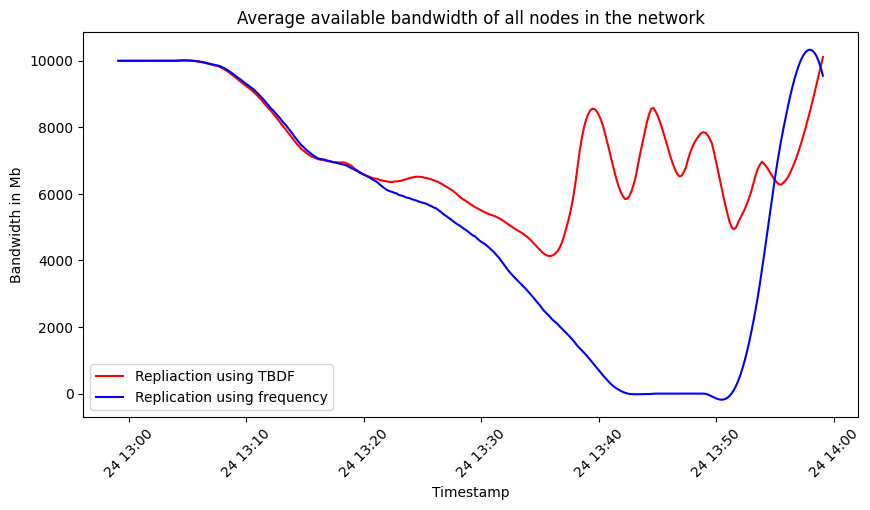

In [7]:
window_length = 35  # Adjust this parameter to control the smoothing effect
bw1_smoothed = savgol_filter(bw1[:min_length], window_length, 3)  # Smoothed data for bw1
bw2_smoothed = savgol_filter(bw2[:min_length], window_length, 3)  # Smoothed data for bw2

plt.figure(figsize=(10,5))
plt.plot(timestamps[:min_length], bw1_smoothed, color='red', label='Repliaction using TBDF')
plt.plot(timestamps[:min_length], bw2_smoothed, color='blue', label='Replication using frequency')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth in Mb')
plt.title('Average available bandwidth of all nodes in the network')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
pattern = r"timing.*"

data1 = []
data2 = []

file_names = glob.glob("/Users/kiran/Code/masters-project/network/results/best/*")
for file_name in file_names:
    if re.match(pattern, file_name):
        with open(file_name, "r") as file:
            content = file.read()
            data1.append(ast.literal_eval(content))

file_names = glob.glob("/Users/kiran/Code/masters-project/network/results/worst/*")
for file_name in file_names:
    if re.match(pattern, file_name):
        with open(file_name, "r") as file:
            content = file.read()
            data2.append(ast.literal_eval(content))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (0,).

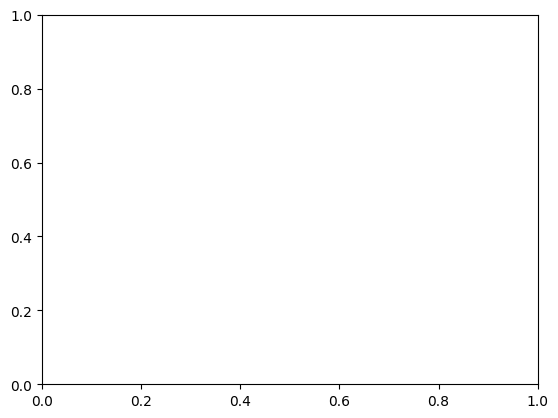

In [13]:
# Extract the node names
labels = [f"Node {i+1}" for i in range(0,5)]

normal_times_1 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data1]
downtimes_1 = [(node['downtime'] / node['simulation_time']) * 100 for node in data1]
overheated_times_1 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data1]

normal_times_2 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data2]
downtimes_2 = [(node['downtime'] / node['simulation_time']) * 100 for node in data2]
overheated_times_2 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data2]

x = np.arange(len(labels)*2)
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x[::2], normal_times_1, width, label='Normal Condition',color='#3BDE51')
rects2 = ax.bar(x[::2], downtimes_1, width, bottom=normal_times_1, label='Unavailable',color='red')
rects3 = ax.bar(x[::2], overheated_times_1, width, bottom=[normal + downtime for normal, downtime in zip(normal_times_1, downtimes_1)], label='Overheated Condition',color='orange')

rects4 = ax.bar(x[1::2], normal_times_2, width, label='Normal Condition',color='#3BDE51')
rects5 = ax.bar(x[1::2], downtimes_2, width, bottom=normal_times_2, label='Unavailable',color='red')
rects6 = ax.bar(x[1::2], overheated_times_2, width, bottom=[normal + downtime for normal, downtime in zip(normal_times_2, downtimes_2)], label='Overheated Condition',color='orange')


ax.set_ylabel('Percentage')
ax.set_xticks(x)
ax.set_xticklabels(['Node 1', 'Data1', 'Node 2', 'Data1', 'Node 3', 'Data1', 'Node 4', 'Data1', 'Node 5', 'Data1'])

# Add labels indicating pairs of bars belong to a node
ax2 = ax.twiny()  # Create a secondary x-axis
ax2.set_xticks(x + width/2)
ax2.set_xticklabels(['Node 1', 'Data1', 'Node 2', 'Data1', 'Node 3', 'Data1', 'Node 4', 'Data1', 'Node 5', 'Data1'])

# Position ax and ax2 at the bottom with vertical spacing
ax.spines['top'].set_visible(False)
ax.xaxis.tick_bottom()
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_bottom()
ax2.spines['bottom'].set_position(('outward', 40))  # Adjust the position of ax2 bottom spine

for rect in rects1 + rects2 + rects3 + rects4 + rects5 + rects6:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.1f}%", ha='center', va='bottom')



legend_labels = ['Normal Condition', 'Unavailable', 'Overheated Condition']
legend_colors = ['#3BDE51', 'red', 'orange']
custom_legend = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(custom_legend, legend_labels)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (0,).

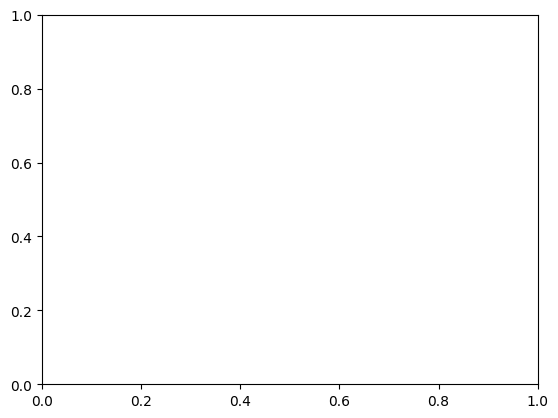

In [10]:
import matplotlib.pyplot as plt
import numpy as np

labels = [f"Node {i+1}" for i in range(0,5)]

normal_times_1 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data1]
downtimes_1 = [(node['downtime'] / node['simulation_time']) * 100 for node in data1]
overheated_times_1 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data1]

normal_times_2 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data2]
downtimes_2 = [(node['downtime'] / node['simulation_time']) * 100 for node in data2]
overheated_times_2 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data2]

# Replace these with your actual data
normal_1 = normal_times_1
overheat_1 = overheated_times_1
unavailable_1 = downtimes_1

normal_2 = normal_times_2
overheat_2 = overheated_times_2
unavailable_2 = downtimes_2

normal_times_1 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data1]
downtimes_1 = [(node['downtime'] / node['simulation_time']) * 100 for node in data1]
overheated_times_1 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data1]

normal_times_2 = [((node['normal_time'] + node['total_idle_time']) / node['simulation_time']) * 100 for node in data2]
downtimes_2 = [(node['downtime'] / node['simulation_time']) * 100 for node in data2]
overheated_times_2 = [(node['overheated_time'] / node['simulation_time']) * 100 for node in data2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, overheat_1, width, label='Overheat_Algo1', bottom = unavailable_1)
ax.bar(x - width/2, unavailable_1, width, label='Unavailable_Algo1')
ax.bar(x - width/2, normal_1, width, label='Normal_Algo1', bottom = [i+j for i,j in zip(overheat_1, unavailable_1)])

ax.bar(x + width/2, normal_2, width, label='Normal_Algo2', bottom = [i+j for i,j in zip(overheat_2, unavailable_2)])
ax.bar(x + width/2, overheat_2, width, label='Overheat_Algo2', bottom = unavailable_2)
ax.bar(x + width/2, unavailable_2, width, label='Unavailable_Algo2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Nodes')
ax.set_ylabel('Percentage Time Spent')
ax.set_title('Percentage Time Spent by Nodes under Different Conditions and Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [11]:
# Create a pandas DataFrame
df = pd.DataFrame({
    'Node': labels,
    'Normal_Algo1': normal_1,
    'Overheat_Algo1': overheat_1,
    'Unavailable_Algo1': unavailable_1,
    'Normal_Algo2': normal_2,
    'Overheat_Algo2': overheat_2,
    'Unavailable_Algo2': unavailable_2
})

# Set 'Node' as the index of the DataFrame
df.set_index('Node', inplace=True)

# Create a new DataFrame with rounded values
rounded_df = df.round(2)

rounded_df.head()

ValueError: All arrays must be of the same length

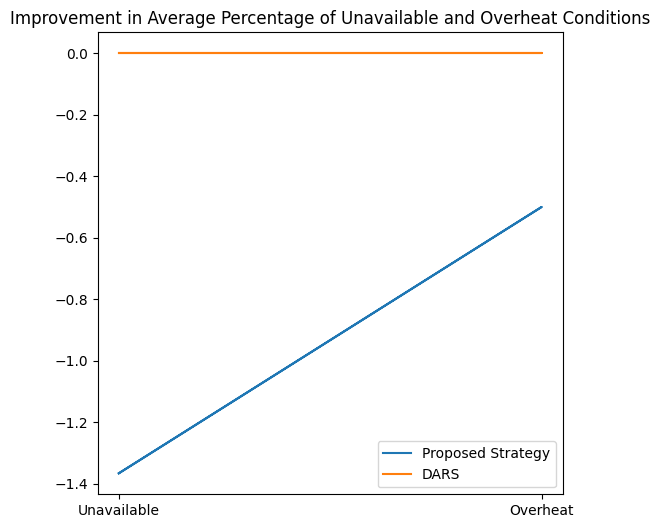

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Proposed Strategy and DARS
nodes = ['Node 1', 'Node 2', 'Node 3', 'Node 4', 'Node 5']
prop_unavailable = [1.71, 0.21, 1.91, 0, 1.49]
dars_unavailable = [1.71, 5.23, 1.91, 0, 3.3]
prop_overheat = [1.71, 0.43, 2.34, 0, 1.49]
dars_overheat = [1.32, 3.03, 1.07, 0, 3.05]

# Calculate average improvement in percentage
avg_improvement_unavailable = np.mean([prop - dars for prop, dars in zip(prop_unavailable, dars_unavailable)])
avg_improvement_overheat = np.mean([prop - dars for prop, dars in zip(prop_overheat, dars_overheat)])

# Create the radar chart
categories = ['Unavailable', 'Overheat']
values_proposed = [avg_improvement_unavailable, avg_improvement_overheat]
values_dars = [0, 0]  # Assuming no improvement in DARS

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the data
ax.plot(categories + [categories[0]], values_proposed + [values_proposed[0]], label='Proposed Strategy')
ax.plot(categories + [categories[0]], values_dars + [values_dars[0]], label='DARS')

# Fill the area under the lines
ax.fill(categories + [categories[0]], values_proposed + [values_proposed[0]], alpha=0.3)
ax.fill(categories + [categories[0]], values_dars + [values_dars[0]], alpha=0.3)

# Set the labels and title
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)
ax.set_title('Improvement in Average Percentage of Unavailable and Overheat Conditions')

# Set the legend
ax.legend()

plt.show()


In [ ]:
node_metrics_best = {}
node_metrics_worst = {}

file_names = glob.glob("/Users/kiran/Code/masters-project/network/results/best/metrics*")
path = "/Users/kiran/Code/masters-project/network/results/best/"
file_contents = None
for filename in file_names:
    file_path = os.path.join(path, filename)
    key = os.path.splitext(os.path.basename(file_path))[0]
    with open(file_path, 'r') as file:
        # Process the file here
        node_metrics_best[key] = file.read()

In [ ]:
ohs = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

bw = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

latency = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

nodes = {}
i = 1
for k, v in node_metrics_best.items():
    x = node_metrics_best[k]
    nodes[i] = eval(x)
    i += 1

for node_id, node_data in nodes.items():
    for val in node_data:
        ohs[node_id].append(val["ohs"])
        bw[node_id].append(val["available_buffer"])
        latency[node_id].append(val["latency"])

# Node metrics

In [29]:
node_metrics_best = {}
node_metrics_worst = {}

file_names = glob.glob("/Users/kiran/Code/masters-project/network/results/worst/metrics*")
path = "/Users/kiran/Code/masters-project/network/results/best/"
file_contents = None
for filename in file_names:
    file_path = os.path.join(path, filename)
    key = os.path.splitext(os.path.basename(file_path))[0]
    with open(file_path, 'r') as file:
        # Process the file here
        node_metrics_best[key] = file.read()
        
file_names = glob.glob("/Users/kiran/Code/masters-project/network/results/best/metrics*")
path = "/Users/kiran/Code/masters-project/network/results/best/"
file_contents = None
for filename in file_names:
    file_path = os.path.join(path, filename)
    key = os.path.splitext(os.path.basename(file_path))[0]
    with open(file_path, 'r') as file:
        # Process the file here
        node_metrics_worst[key] = file.read()

In [30]:
ohs_worst = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

bw_worst = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

latency_worst = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

ohs_best = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

bw_best = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

latency_best = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}


nodes = {}
i = 1
for k, v in node_metrics_worst.items():
    x = node_metrics_worst[k]
    nodes[i] = eval(x)
    i += 1

for node_id, node_data in nodes.items():
    for val in node_data:
        ohs_worst[node_id].append(int(val["ohs"]))
        bw_worst[node_id].append(val["available_buffer"])
        latency_worst[node_id].append(val["latency"])
        
nodes = {}
i = 1
for k, v in node_metrics_best.items():
    x = node_metrics_best[k]
    nodes[i] = eval(x)
    i += 1

for node_id, node_data in nodes.items():
    for val in node_data:
        ohs_best[node_id].append(val["ohs"])
        bw_best[node_id].append(val["available_buffer"])
        latency_best[node_id].append(val["latency"])

In [31]:
def get_df_plot(values, y_range, window_size):
    # Generate x-axis values (time)
    time = np.arange(len(values))

    # Create a cubic spline interpolation object
    spline = CubicSpline(time, values)

    # Generate more points for smoother curve
    smooth_time = np.linspace(time.min(), time.max(), len(values))

    # Interpolate values using the cubic spline
    smoothed_values = spline(smooth_time)

    # Convert smooth_time to datetime objects
    start_time = datetime.now()  # Assuming a starting time
    time_diff = timedelta(minutes=1)  # Assuming a time difference between points
    smooth_time = [start_time + i * time_diff for i in smooth_time]

    data = pd.DataFrame({'Timestamp': smooth_time, 'Value': smoothed_values})

    smoothed_data = data['Value'].rolling(window_size, center=True).mean()

    smoothed_values = smoothed_data

    # Function to scale data
    def scale_data(data, data_range):
        data_min, data_max = np.min(data), np.max(data)
        range_min, range_max = data_range
        scaled_data = (data - data_min) / (data_max - data_min) * (range_max - range_min) + range_min
        return scaled_data

    def scale_datetime(dt, dt_range):
        dt_min, dt_max = min(dt), max(dt)
        range_min, range_max = dt_range

        dt_diff = dt_max - dt_min
        range_diff = range_max - range_min

        scaled_dt = []
        for dt_val in dt:
            scale = (dt_val - dt_min) / dt_diff
            scaled_val = range_min + scale * range_diff
            scaled_dt.append(scaled_val)

        return scaled_dt

    # Scale data
    x_range = (datetime(2023, 5, 1, 0, 0), datetime(2023, 5, 1, 0, 30))

    x_scaled = scale_datetime(smooth_time, x_range)
    y_scaled = scale_data(smoothed_values, y_range)

    # Create a DataFrame for Seaborn
    df = pd.DataFrame({
        'x': x_scaled,
        'y': y_scaled
    })
    
    return df


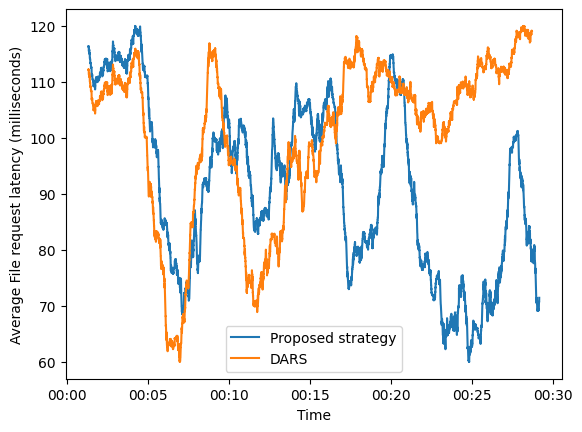

In [32]:
y_range = [60, 120]
window_size = 1000

df_best = get_df_plot(latency_best[1], y_range, window_size)
df_worst = get_df_plot(latency_worst[1], y_range, window_size)

df_best.head()

df_merged = pd.concat([df_best['y'], df_worst['y'], df_best['x']], axis=1)
df_merged.columns = ['y_best', 'y_worst', 'x']


sns.lineplot(x='x', y='y_worst', data=df_merged, label='Proposed strategy')
sns.lineplot(x='x', y='y_best', data=df_merged, label='DARS')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.xlabel("Time")
plt.ylabel("Average File request latency (milliseconds)")
# plt.title("Average latency of network")
plt.legend()
plt.show()


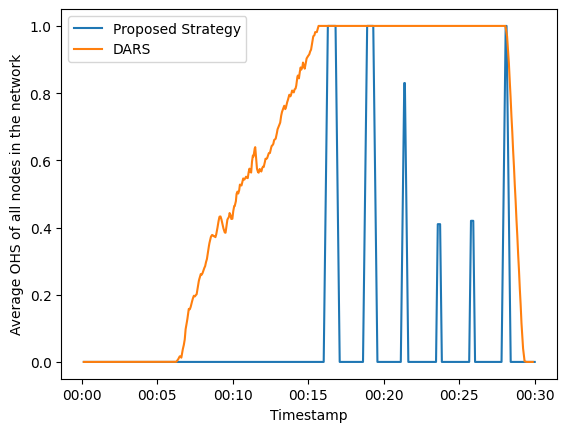

In [40]:
y_range = [0, 1]
window_size = 100

df_best = get_df_plot(ohs_best[2], y_range, window_size)
df_worst = get_df_plot(ohs_worst[2], y_range, window_size)

df_merged = pd.concat([df_best['y'], df_worst['y'], df_best['x']], axis=1)
df_merged.columns = ['y_best', 'y_worst', 'x']

sns.lineplot(x='x', y='y_worst', data=df_merged, label='Proposed Strategy')
sns.lineplot(x='x', y='y_best', data=df_merged, label='DARS')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.xlabel("Timestamp")
plt.ylabel("Average OHS of all nodes in the network")
# plt.title('Average overheating similarity of the network')
plt.legend()
plt.show()


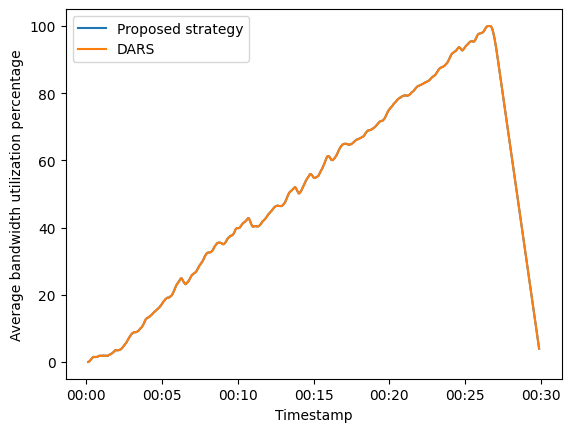

In [50]:
y_range = [0, 100]
window_size = 100

df_best = get_df_plot(bw_best[3], y_range, window_size)
df_worst = get_df_plot(bw_best[3], y_range, window_size)

df_merged = pd.concat([df_best['y'], df_worst['y'], df_best['x']], axis=1)
df_merged.columns = ['y_best', 'y_worst', 'x']

sns.lineplot(x='x', y='y_best', data=df_merged, label='Proposed strategy')
sns.lineplot(x='x', y='y_worst', data=df_merged, label='DARS')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.xlabel("Timestamp")
plt.ylabel("Average bandwidth utilization percentage")
# plt.title('Average percentage of bandwidth in all nodes')
plt.legend()
plt.show()


In [8]:
total_best = [120.4,120.09,120.68,120.55,119.79]
down_best = [2.3,0.25,2.06,1.79,0]
total_worst = [96.85,92.90,97.86,92.92,89.27]
down_worst = [0,4.85,3.06,0,0]

In [9]:
t_b = sum(total_best)
d_b = sum(down_best)

print("best = ", 100-(d_b*100/t_b))

t_b = sum(total_worst)
d_b = sum(down_worst)

print("worst = ", 100-(d_b*100/t_b))

best =  98.93601103888547
worst =  98.31630481055768


In [10]:
def calculate_percentage_improvement(new_value, existing_value):
    return ((new_value - existing_value) / existing_value) * 100

# latency_existing = list(df_merged['y_best'].dropna())
# latency_new = list(df_merged['y_worst'].dropna())

# bandwidth_util_existing = bw_best[3]
# bandwidth_util_new = bw_best[5]

# # Calculate average latency for each algorithm
# avg_latency_existing = list(df_merged['y_best'].dropna())
# avg_latency_new = list(df_merged['y_worst'].dropna())

# # Calculate percentage improvement for latency
# latency_improvement = calculate_percentage_improvement(avg_latency_new, avg_latency_existing)

# Calculate average bandwidth utilization for each algorithm
avg_bandwidth_util_existing = sum(bandwidth_util_existing) / len(bandwidth_util_existing)
avg_bandwidth_util_new = sum(bandwidth_util_new) / len(bandwidth_util_new)

# Calculate percentage improvement for bandwidth utilization
bandwidth_util_improvement = calculate_percentage_improvement(avg_bandwidth_util_new, avg_bandwidth_util_existing)

# Print the results
print(f"Latency Improvement: {latency_improvement:.2f}%")
print(f"Bandwidth Utilization Improvement: {bandwidth_util_improvement:.2f}%")


NameError: name 'bandwidth_util_existing' is not defined

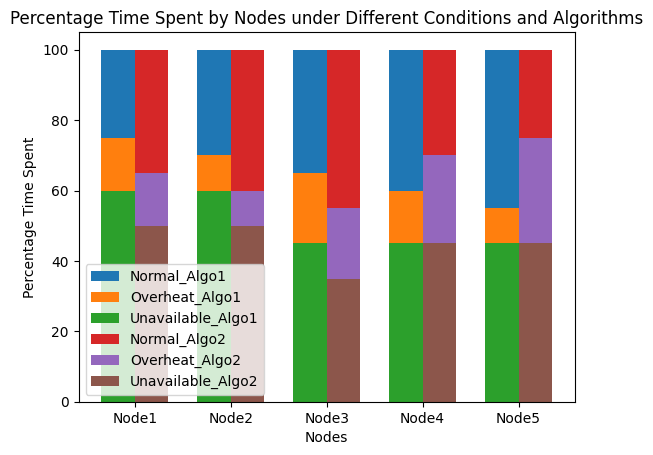

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual data
normal_1 = [25, 30, 35, 40, 45]
overheat_1 = [15, 10, 20, 15, 10]
unavailable_1 = [60, 60, 45, 45, 45]

normal_2 = [35, 40, 45, 30, 25]
overheat_2 = [15, 10, 20, 25, 30]
unavailable_2 = [50, 50, 35, 45, 45]

labels = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, normal_1, width, label='Normal_Algo1', bottom = [i+j for i,j in zip(overheat_1, unavailable_1)])
ax.bar(x - width/2, overheat_1, width, label='Overheat_Algo1', bottom = unavailable_1)
ax.bar(x - width/2, unavailable_1, width, label='Unavailable_Algo1')

ax.bar(x + width/2, normal_2, width, label='Normal_Algo2', bottom = [i+j for i,j in zip(overheat_2, unavailable_2)])
ax.bar(x + width/2, overheat_2, width, label='Overheat_Algo2', bottom = unavailable_2)
ax.bar(x + width/2, unavailable_2, width, label='Unavailable_Algo2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Nodes')
ax.set_ylabel('Percentage Time Spent')
ax.set_title('Percentage Time Spent by Nodes under Different Conditions and Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


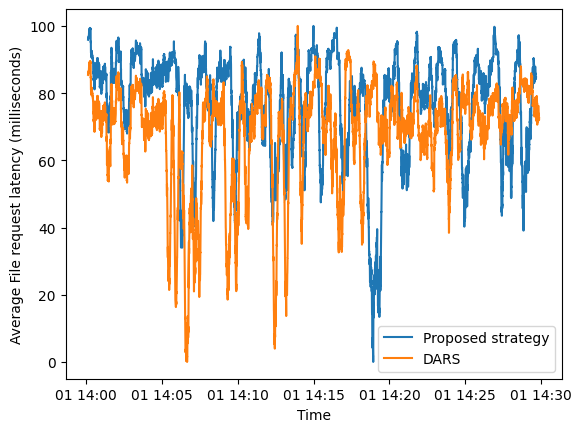

In [12]:
df_best = get_df_plot(latency_best[1], y_range, window_size)
df_worst = get_df_plot(latency_worst[1], y_range, window_size)

df_merged = pd.concat([df_best['y'], df_worst['y'], df_best['x']], axis=1)
df_merged.columns = ['y_best', 'y_worst', 'x']

sns.lineplot(x='x', y='y_worst', data=df_merged, label='Proposed strategy')
sns.lineplot(x='x', y='y_best', data=df_merged, label='DARS')
plt.xlabel("Time")
plt.ylabel("Average File request latency (milliseconds)")
plt.legend()
plt.show()
